In [51]:
%run ../ImportsConstantsSparkInit.ipynb
sc.setJobGroup("PLT_Hours", "PLT_Hours")

In [52]:
df = spark.read.format("mongo").option("collection", "AccidentCountByHour").load()
df.printSchema()
df.show()

root
 |-- AccidentCount: long (nullable = true)
 |-- Hour: string (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)

+-------------+----+--------------------+
|AccidentCount|Hour|                 _id|
+-------------+----+--------------------+
|        99071|  10|[6460848a81e7d578...|
|        75138|  03|[6460848a81e7d578...|
|        52401|  08|[6460848a81e7d578...|
|        71108|  09|[6460848a81e7d578...|
|        55371|  07|[6460848a81e7d578...|
|       104143|  00|[6460848a81e7d578...|
|       110452|  15|[6460848a81e7d578...|
|        59218|  06|[6460848a81e7d578...|
|       209736|  19|[6460848a81e7d578...|
|       133314|  12|[6460848a81e7d578...|
|       131412|  16|[6460848a81e7d578...|
|        89545|  01|[6460848a81e7d578...|
|       183146|  22|[6460848a81e7d578...|
|       182674|  18|[6460848a81e7d578...|
|       151621|  17|[6460848a81e7d578...|
|        60245|  05|[6460848a81e7d578...|
|       212802|  21|[6460848a81e7d578...|


In [53]:
df = df.orderBy("Hour")
df = df.na.replace(hoursDict)
df.show(24)

+-------------+--------+--------------------+
|AccidentCount|    Hour|                 _id|
+-------------+--------+--------------------+
|       104143| 12-1 AM|[6460848a81e7d578...|
|        89545|  1-2 AM|[6460848a81e7d578...|
|        81704|  2-3 AM|[6460848a81e7d578...|
|        75138|  3-4 AM|[6460848a81e7d578...|
|        70740|  4-5 AM|[6460848a81e7d578...|
|        60245|  5-6 AM|[6460848a81e7d578...|
|        59218|  6-7 AM|[6460848a81e7d578...|
|        55371|  7-8 AM|[6460848a81e7d578...|
|        52401|  8-9 AM|[6460848a81e7d578...|
|        71108| 9-10 AM|[6460848a81e7d578...|
|        99071|10-11 AM|[6460848a81e7d578...|
|       127905|11-12 PM|[6460848a81e7d578...|
|       133314| 12-1 PM|[6460848a81e7d578...|
|       118336|  1-2 PM|[6460848a81e7d578...|
|       105461|  2-3 PM|[6460848a81e7d578...|
|       110452|  3-4 PM|[6460848a81e7d578...|
|       131412|  4-5 PM|[6460848a81e7d578...|
|       151621|  5-6 PM|[6460848a81e7d578...|
|       182674|  6-7 PM|[6460848a8

In [54]:
df = df.toPandas()
df = df.set_index('Hour')
display(df)

,AccidentCount,_id
Hour,,
12-1 AM,104143,"(6460848a81e7d5782c808989,)"
1-2 AM,89545,"(6460848a81e7d5782c808983,)"
2-3 AM,81704,"(6460848a81e7d5782c80898e,)"
3-4 AM,75138,"(6460848a81e7d5782c80897c,)"
4-5 AM,70740,"(6460848a81e7d5782c80897b,)"
5-6 AM,60245,"(6460848a81e7d5782c80897e,)"
6-7 AM,59218,"(6460848a81e7d5782c80898b,)"
7-8 AM,55371,"(6460848a81e7d5782c808981,)"
8-9 AM,52401,"(6460848a81e7d5782c80898d,)"


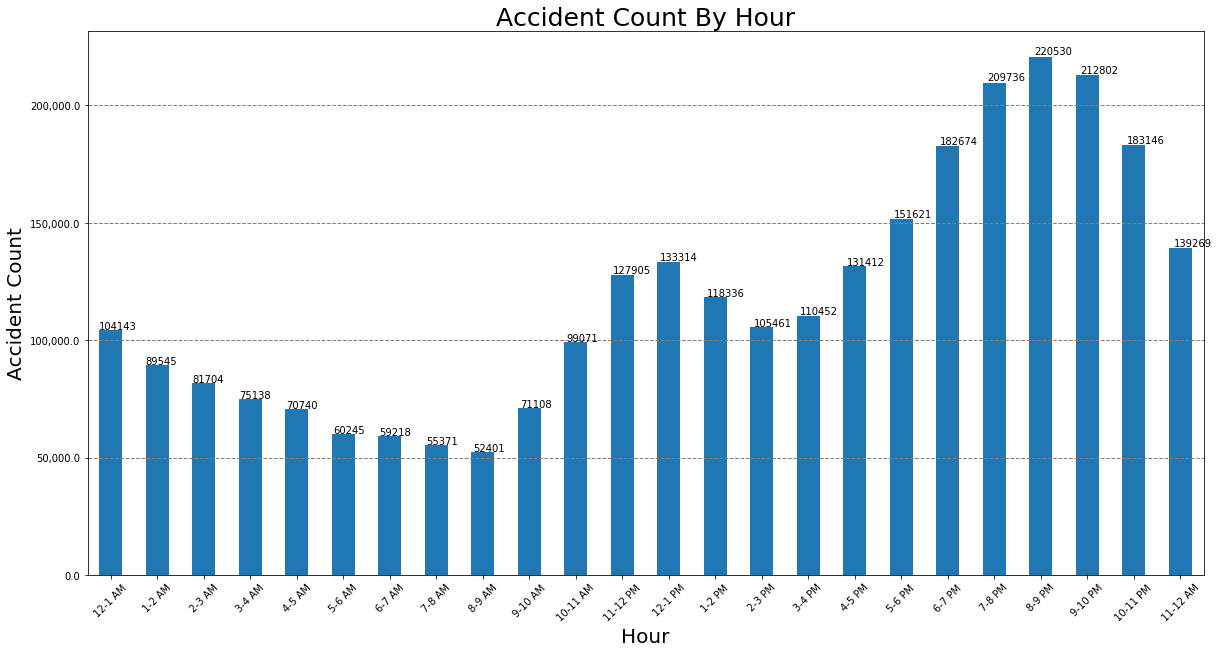

In [55]:
ax = df.plot.bar(rot=45, legend=False, figsize=(20,10))
ax.set_xlabel("Hour", fontsize=20)
ax.set_ylabel("Accident Count", fontsize=20)
ax.set_title("Accident Count By Hour", fontsize = 25)
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis='y')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))